In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import pickle


In [2]:
# Loading pickled cleaned df
clean_df = pd.read_pickle('data/pickled/cleaned_df.pkl')

In [3]:
clean_df.head()

,DR Number,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Status Code,Status Description,latitude,longitude
Date Occurred,,,,,,,,,,,,,,,,
2010-01-01,102120693,1117,21,Topanga,2156,354,THEFT OF IDENTITY,21,M,H,404.0,DEPARTMENT STORE,IC,Invest Cont,34.1875,-118.603
2010-01-01,100504041,2130,5,Harbor,563,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,104.0,DRIVEWAY,IC,Invest Cont,33.737,-118.2967
2010-01-01,100504042,1600,5,Harbor,519,510,VEHICLE - STOLEN,0,X,X,101.0,STREET,IC,Invest Cont,33.7926,-118.2468
2010-01-01,100504046,1800,5,Harbor,506,330,BURGLARY FROM VEHICLE,49,M,H,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,33.8325,-118.3039
2010-01-01,100504048,1425,5,Harbor,503,624,BATTERY - SIMPLE ASSAULT,52,F,H,101.0,STREET,AO,Adult Other,33.7909,-118.296


In [4]:
# clean_df['Area Name'].value_counts().plot(kind='barh')

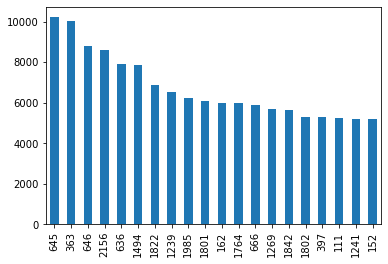

In [5]:
clean_df['Reporting District'].value_counts()[:20].plot(kind='bar')

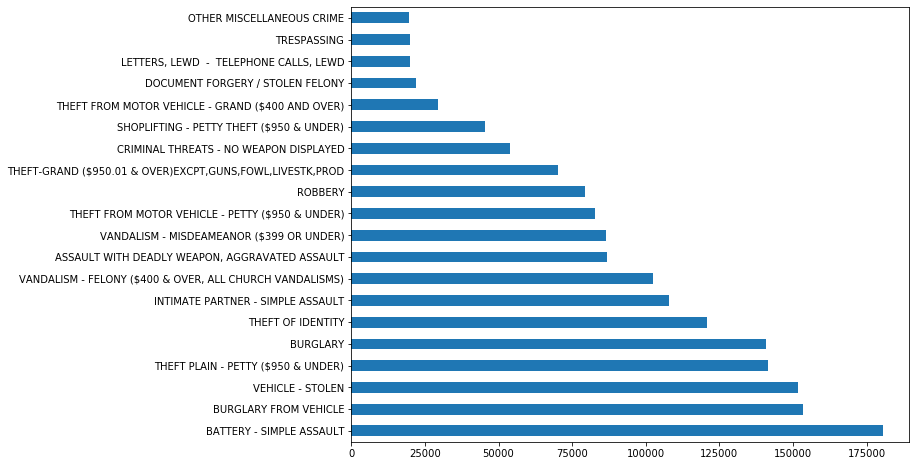

In [6]:
plt.figure(figsize=(10,8))
clean_df['Crime Code Description'].value_counts()[:20].plot(kind='barh', )


In [7]:
clean_df['Victim Age'].value_counts(normalize= True)

0      1.739277e-01
25     2.285553e-02
26     2.249933e-02
27     2.224548e-02
24     2.224448e-02
           ...     
96     9.030437e-05
97     7.826379e-05
98     5.468431e-05
114    5.016909e-07
118    5.016909e-07
Name: Victim Age, Length: 101, dtype: float64

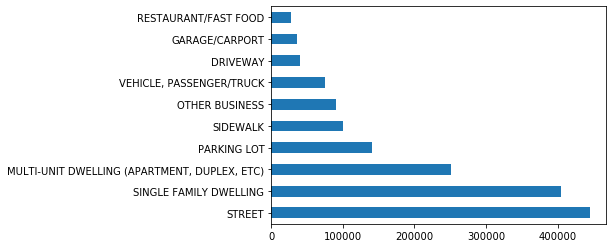

In [8]:
clean_df['Premise Description'].value_counts()[:10].plot(kind='barh')

In [9]:
conditions= [(clean_df['Time Occurred'] <= 24),
            (clean_df['Time Occurred'] > 24) & (clean_df['Time Occurred'] < 100)]
choices = [(clean_df['Time Occurred']*100), 
           (clean_df['Time Occurred'] * 10)]
clean_df['Time Occurred'] = np.select(conditions, choices,
                                     clean_df['Time Occurred'])

In [10]:
# pd.set_option('display.max_rows', None)
# clean_df['Time Occurred'].value_counts()

In [11]:
clean_df['Time Occurred'][0]

1117

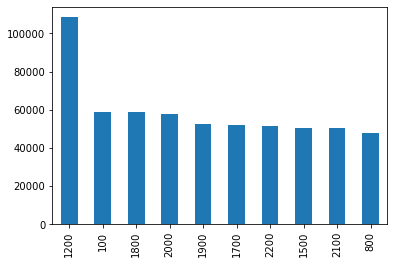

In [12]:
clean_df['Time Occurred'].value_counts()[:10].plot(kind='bar')

In [13]:
crime_time =pd.DataFrame(clean_df['Time Occurred'].value_counts().reset_index())

In [14]:
crime_time

,index,Time Occurred
0,1200,108485
1,100,59052
2,1800,58885
3,2000,57666
4,1900,52291
...,...,...
1392,634,11
1393,644,10
1394,531,9
1395,431,5


In [15]:
crime_time2 = pd.DataFrame()

http://censusviewer.com/city/CA/Los%20Angeles
https://www.census.gov/quickfacts/fact/table/losangelescitycalifornia/RHI725219#RHI725219

In [16]:
clean_df['Victim Sex'].value_counts(normalize = True)

M    0.461759
F    0.421620
X    0.116622
Name: Victim Sex, dtype: float64

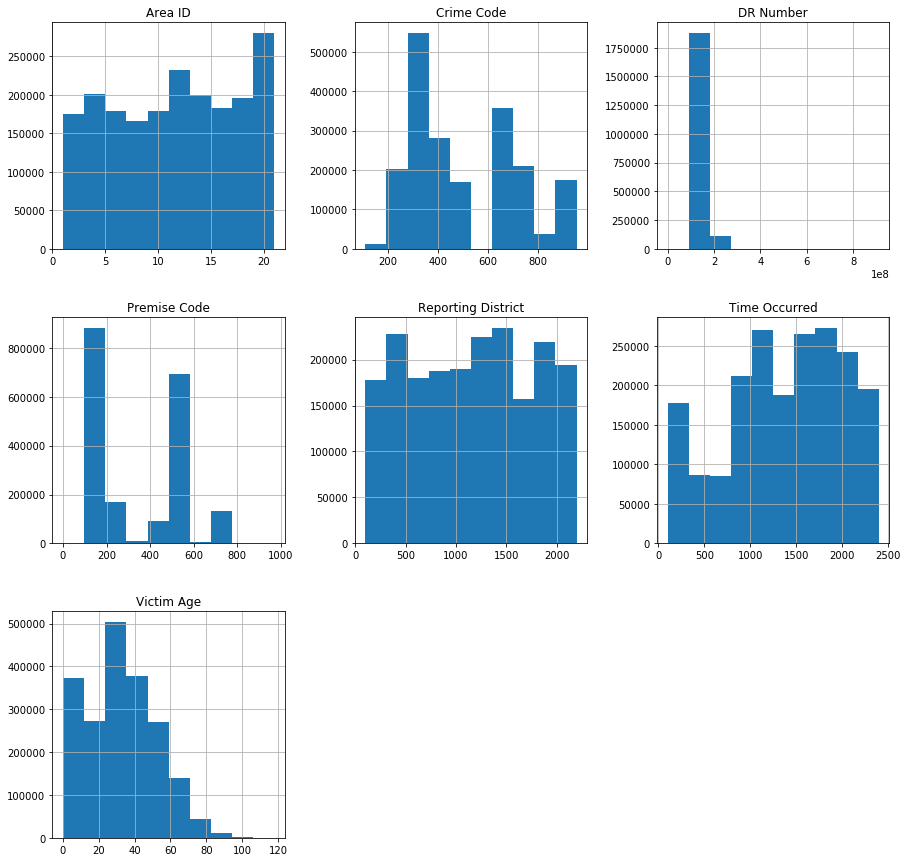

In [17]:
clean_df.hist(figsize= (15,15));

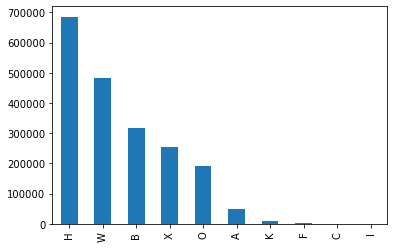

In [18]:
clean_df['Victim Descent'].value_counts()[:10].plot(kind = 'bar')

In [19]:
clean_df['Victim Descent'].groupby(clean_df['Victim Sex']).count()

Victim Sex
F    840397
M    920405
X    232457
Name: Victim Descent, dtype: int64

In [20]:
descent_dict ={'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese',
               'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian',
               'H': 'Latinx', 'I': 'Native', 'J': 'Japanese', 
               'K': 'Korean', 'L': 'Laotian', 'O': 'Other',
               'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian',
               'V': 'Vietnamese', 'W': 'White',  'X': 'Unknown', 'Z':'Asian Indian'}

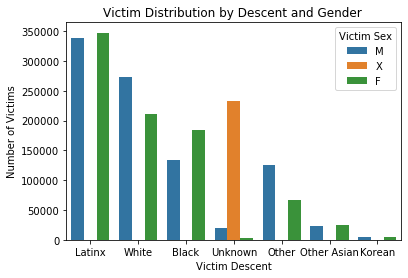

In [21]:
sns.countplot(x='Victim Descent', hue = "Victim Sex", 
              data= clean_df, order=clean_df['Victim Descent'].value_counts()[:7].index)
plt.xticks(np.arange(7),labels=['Latinx','White','Black','Unknown', 'Other', 'Other Asian','Korean'])
plt.ylabel('Number of Victims')
plt.title('Victim Distribution by Descent and Gender ');

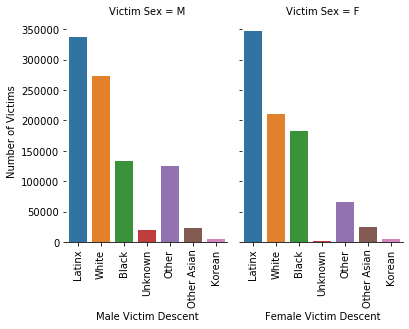

In [22]:


g = sns.catplot(x="Victim Descent", col="Victim Sex",
                col_order=clean_df['Victim Sex'].value_counts()[0:2].index,
                data=clean_df, kind="count",
                height=4, aspect=.7, 
                order=clean_df['Victim Descent'].value_counts()[:7].index)
g.set_xticklabels(['Latinx','White','Black','Unknown', 'Other', 'Other Asian','Korean'], rotation= 'vertical')
g.set_ylabels('Number of Victims')

g.axes[0,0].set_xlabel('Male Victim Descent')
g.axes[0,1].set_xlabel('Female Victim Descent')

        
    
g.despine(left=True);

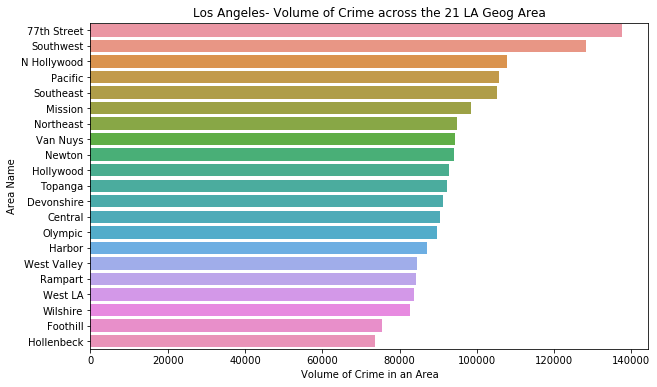

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y='Area Name', data= clean_df, orient="h", 
              order=clean_df['Area Name'].value_counts().index)
plt.xlabel('Volume of Crime in an Area')
plt.title('Los Angeles- Volume of Crime across the 21 LA Geog Area')

plt.savefig('visualizations/Volume_of_victims_per_LA_geographic_area.png');


http://maps.latimes.com/lapd/

In [24]:
clean_df['Victim Sex'].value_counts()

M    920405
F    840397
X    232457
Name: Victim Sex, dtype: int64

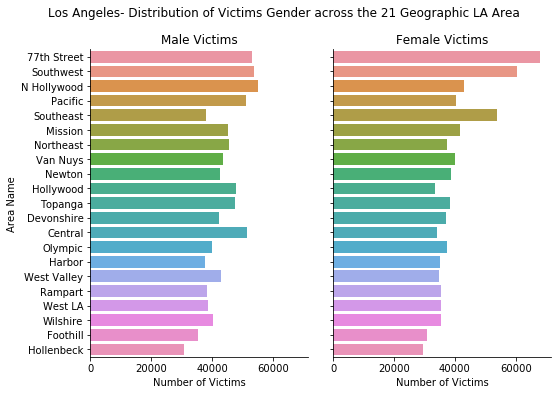

In [25]:
# plt.figure(figsize=(15,8))
g = sns.catplot(y="Area Name", col="Victim Sex",
                col_order=clean_df['Victim Sex'].value_counts()[0:2].index,
            data=clean_df, kind="count",
            height=5, aspect=.8,
                order=clean_df['Area Name'].value_counts().index)
g.axes[0,0].set_xlabel('Number of Victims')
g.axes[0,0].set_title('Male Victims')

g.axes[0,1].set_xlabel('Number of Victims')
g.axes[0,1].set_title('Female Victims')

g.fig.suptitle('Los Angeles- Distribution of Victims Gender across the 21 Geographic LA Area', y = 1.05)

g.savefig('visualizations/Distribution_of_victims_by_Gender_and_area_name.png');

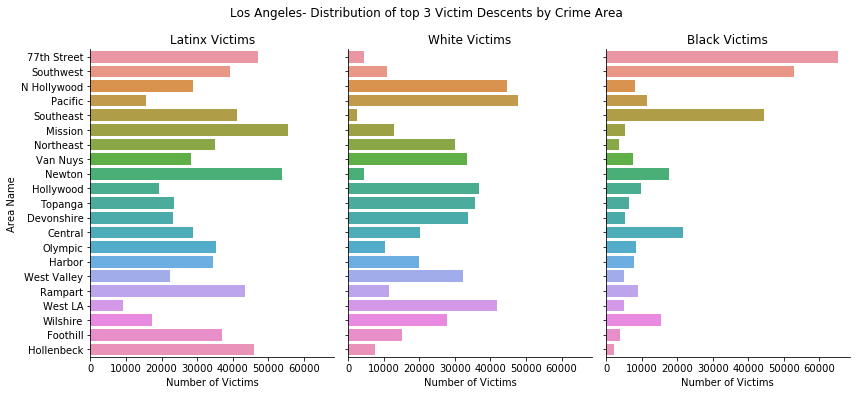

In [26]:
g = sns.catplot(y="Area Name", col="Victim Descent",
                col_order= clean_df['Victim Descent'].value_counts()[:3].index
                ,data=clean_df, kind="count",height=5, aspect=.8,
               order=clean_df['Area Name'].value_counts().index)
g.axes[0,0].set_xlabel('Number of Victims')
g.axes[0,0].set_title('Latinx Victims')

g.axes[0,1].set_xlabel('Number of Victims')
g.axes[0,1].set_title('White Victims')

g.axes[0,2].set_xlabel('Number of Victims')
g.axes[0,2].set_title('Black Victims')

g.fig.suptitle('Los Angeles- Distribution of top 3 Victim Descents by Crime Area ', y = 1.05)

g.savefig('visualizations/Distribution_of_victims_by_descent_and_area_name.png');


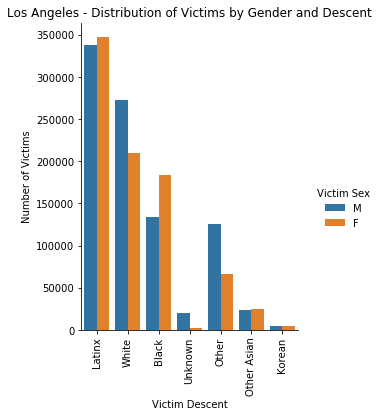

In [27]:
g = sns.catplot(x="Victim Descent", hue="Victim Sex",
                hue_order=clean_df['Victim Sex'].value_counts()[0:2].index,
            data=clean_df, kind="count",
            height=5, aspect=.8,
                order=clean_df['Victim Descent'].value_counts()[0:7].index)
g.set_xticklabels(['Latinx','White','Black','Unknown', 'Other', 'Other Asian','Korean'], rotation= 'vertical')
g.set_ylabels('Number of Victims')
plt.title('Los Angeles - Distribution of Victims by Gender and Descent')
g.savefig('visualizations/Distribution_of_victims_by_descent_and_gender.png');



/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


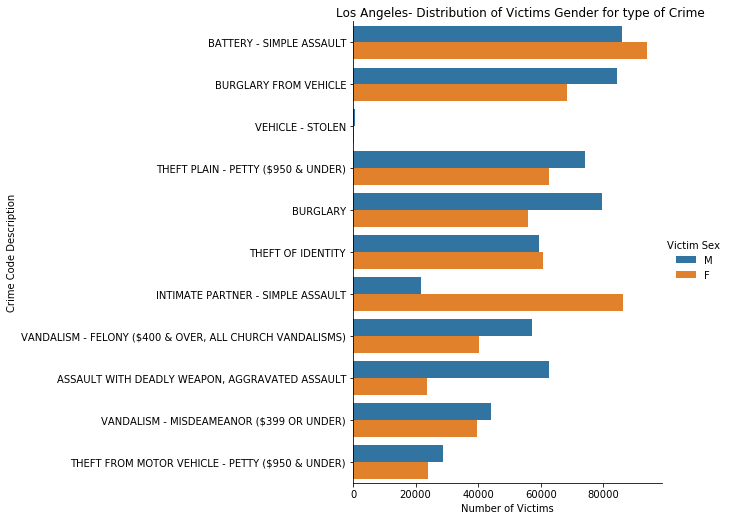

In [28]:
g = sns.catplot(y="Crime Code Description", hue="Victim Sex",
                hue_order=clean_df['Victim Sex'].value_counts()[0:2].index,
            data=clean_df, kind="count",
            height=7, aspect=.7,
                order=clean_df['Crime Code Description'].value_counts()[0:11].index)
g.set_xlabels('Number of Victims')
g.fig.suptitle('Los Angeles- Distribution of Victims Gender for type of Crime', y = 1.00)
g.savefig('visualizations/Distribution_of_Victims_Gender_for_type_of_Crime.png');

In [29]:
clean_df['Premise Description'].value_counts()[0:15]

STREET                                          445473
SINGLE FAMILY DWELLING                          404761
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    251638
PARKING LOT                                     141372
SIDEWALK                                         99607
OTHER BUSINESS                                   90856
VEHICLE, PASSENGER/TRUCK                         75363
DRIVEWAY                                         40467
GARAGE/CARPORT                                   35637
RESTAURANT/FAST FOOD                             27415
DEPARTMENT STORE                                 27299
MARKET                                           20667
OTHER STORE                                      15670
PARKING UNDERGROUND/BUILDING                     14773
PARK/PLAYGROUND                                  13807
Name: Premise Description, dtype: int64

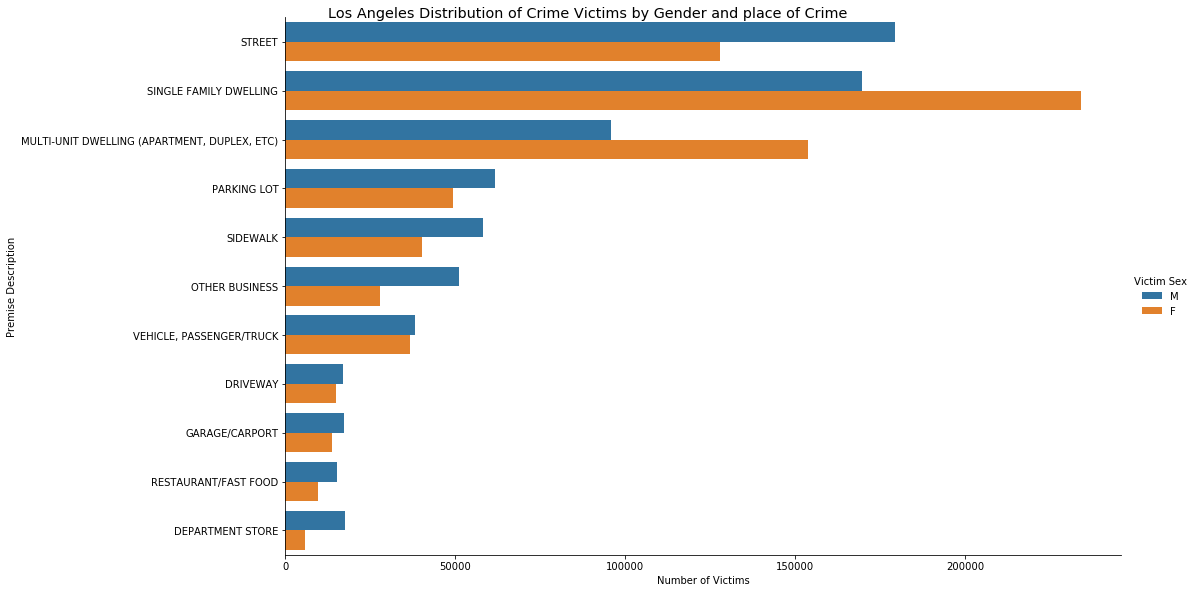

In [30]:
g = sns.catplot(y="Premise Description", hue="Victim Sex",
                hue_order=clean_df['Victim Sex'].value_counts()[0:2].index,
            data=clean_df, kind="count",
            height=8, aspect=2,
                order=clean_df['Premise Description'].value_counts()[0:11].index)
g.set_xlabels('Number of Victims')
g.fig.suptitle('Los Angeles Distribution of Crime Victims by Gender and place of Crime', y = 1.00, fontsize='x-large')
g.savefig('visualizations/Distribution of Crime Victims by Gender and place of Crime.png');

# Crime Data- Trend Analysis (Visualizations)

In [31]:
crime_volume = pd.DataFrame(clean_df.groupby(clean_df.index.date).size(), 
                            columns=['crime_count']).reset_index()
crime_volume.rename(columns = {'index':'Date'}, inplace = True)
crime_volume.head(2)

,Date,crime_count
0,2010-01-01,2222
1,2010-01-02,533


In [32]:
crime_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460 entries, 0 to 3459
Data columns (total 2 columns):
Date           3460 non-null object
crime_count    3460 non-null int64
dtypes: int64(1), object(1)
memory usage: 54.2+ KB


Assumptions:
1. No constant mean. violates stationarity assumption. there is an upward trend rather.m

In [33]:
crime_volume['Date']= pd.to_datetime(crime_volume['Date'], format='%Y-%m-%d')

In [34]:
crime_volume.set_index('Date', inplace=True)

In [35]:
crime_volume.head(2)

,crime_count
Date,
2010-01-01,2222
2010-01-02,533


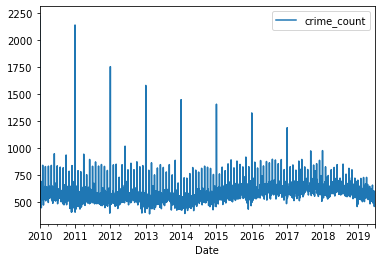

In [36]:
crime_volume.plot()

In [37]:
monthly_crime=crime_volume.resample('MS').mean()
monthly_crime

,crime_count
Date,
2010-01-01,624.935484
2010-02-01,571.392857
2010-03-01,584.096774
2010-04-01,591.600000
2010-05-01,570.935484
...,...
2019-02-01,568.000000
2019-03-01,594.064516
2019-04-01,579.033333


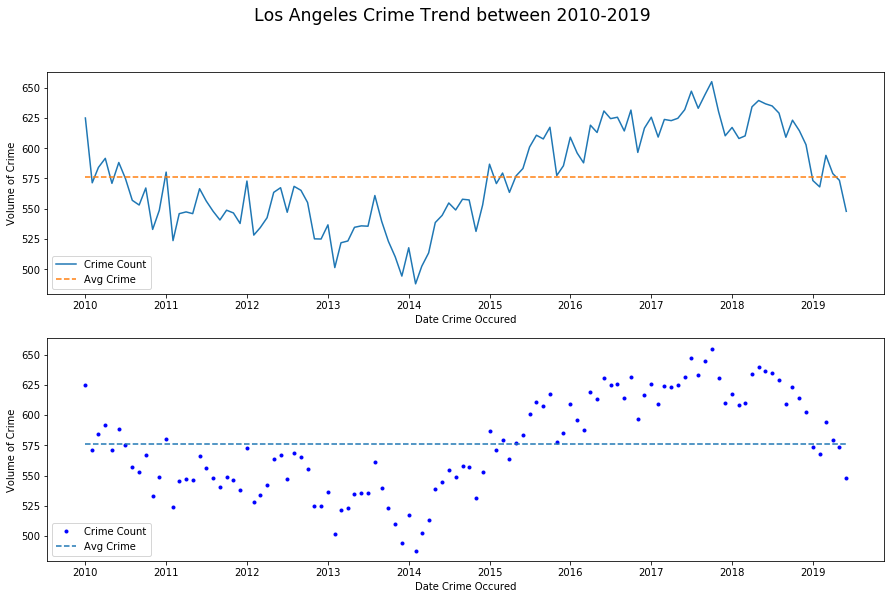

In [38]:
crime_trend,axs = plt.subplots(2,figsize=(15,9))
crime_trend.suptitle('Los Angeles Crime Trend between 2010-2019', size = 'xx-large')

#calculating average for avg line
avg = y_mean = [np.mean(monthly_crime['crime_count']) for i in monthly_crime['crime_count']]

axs[0].plot(monthly_crime
            , label='Crime Count')
axs[0].plot(monthly_crime.index, avg, label = 'Avg Crime', linestyle= '--')

axs[0].set_xlabel('Date Crime Occured')
axs[0].set_ylabel('Volume of Crime')

axs[1].plot(monthly_crime,'.b',label='Crime Count' )
axs[1].plot(monthly_crime.index, avg, label = 'Avg Crime', linestyle= '--')

axs[1].set_xlabel('Date Crime Occured')
axs[1].set_ylabel('Volume of Crime')

#legend location
axs[0].legend(loc='lower left')
axs[1].legend(loc='lower left')

plt.savefig('visualizations/Monthly Crime Trend lineplot and dotplot.png');

In [39]:
year_groups= monthly_crime.groupby(pd.Grouper(freq='A'))
next(iter(year_groups))

(Timestamp('2010-12-31 00:00:00', freq='A-DEC'),             crime_count
 Date                   
 2010-01-01   624.935484
 2010-02-01   571.392857
 2010-03-01   584.096774
 2010-04-01   591.600000
 2010-05-01   570.935484
 2010-06-01   588.166667
 2010-07-01   574.935484
 2010-08-01   556.903226
 2010-09-01   553.033333
 2010-10-01   567.096774
 2010-11-01   532.866667
 2010-12-01   548.645161)

In [40]:
# Create a new DataFrame and store yearly values in columns 
annual_crime = pd.DataFrame()
#looping throup the year_unemp groupby object as a tuple
for date,group in year_groups:
    year = date.year          #pulling the year from datetime object
    if year == 2019:
        break
    series = group.values.ravel()  # flattening the array
    annual_crime[year] = series
    
annual_crime

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,624.935484,580.225806,572.838710,536.645161,517.709677,586.774194,609.064516,625.580645,617.129032
1,571.392857,523.607143,528.172414,501.321429,487.892857,570.750000,596.000000,609.178571,608.000000
2,584.096774,545.870968,534.290323,521.838710,502.451613,579.451613,587.870968,623.741935,610.161290
3,591.600000,547.333333,542.533333,523.300000,513.466667,563.466667,619.000000,622.766667,634.200000
4,570.935484,545.903226,563.483871,534.612903,538.548387,577.096774,612.967742,624.709677,639.419355
5,588.166667,566.500000,567.333333,535.800000,544.466667,583.200000,630.766667,631.800000,636.666667
6,574.935484,556.387097,547.032258,535.516129,554.709677,600.935484,624.419355,647.096774,634.903226
7,556.903226,547.903226,568.451613,560.870968,548.935484,610.709677,625.580645,632.967742,629.000000
8,553.033333,540.666667,565.166667,539.433333,557.800000,607.633333,614.233333,644.366667,609.033333
9,567.096774,548.741935,555.096774,523.064516,557.225806,617.290323,631.483871,654.967742,623.129032


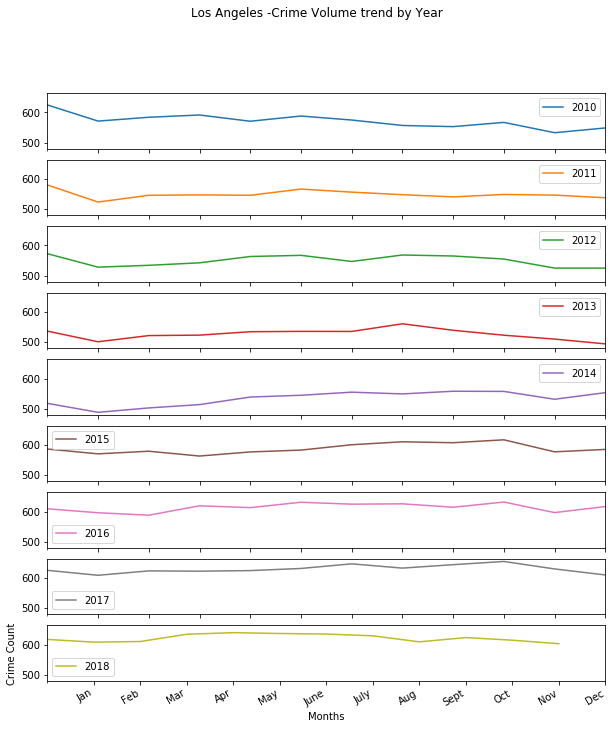

In [41]:
# Plot the yearly groups as subplots
annual_crime.plot(figsize=(10,12), subplots= True, legend=True, 
                           title='Los Angeles -Crime Volume trend by Year',sharey=True )
plt.xlabel('Months')
plt.ylabel('Crime Count')
plt.xticks(ticks = range(1,13), labels= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug','Sept', 'Oct', 'Nov', 'Dec'])
plt.savefig('visualizations/Los_Angeles_Crime_Trend_subplots.png')
plt.show();

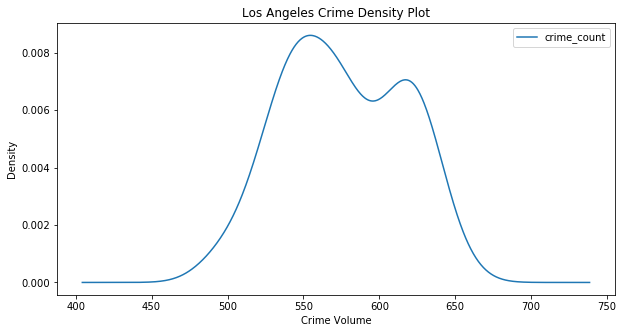

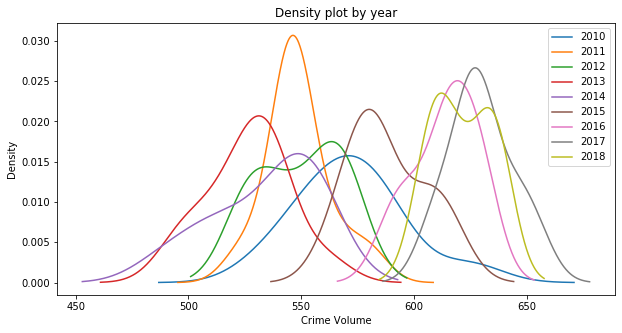

In [42]:
# Plot a density plot 
monthly_crime.plot(kind='kde', figsize=(10,5))
plt.xlabel('Crime Volume')
plt.title('Los Angeles Crime Density Plot')
plt.savefig('visualizations/Los_Angeles_Crime_Count_kde.png')
plt.show();

# Plot density plot for the last 10 years
annual_crime.plot(kind='kde', figsize=(10,5))
plt.title('Density plot by year')
plt.xlabel('Crime Volume')
# plt.savefig('visualizations/Los_Angeles_Annual_Crime_Count_kde.png.png')
plt.show();

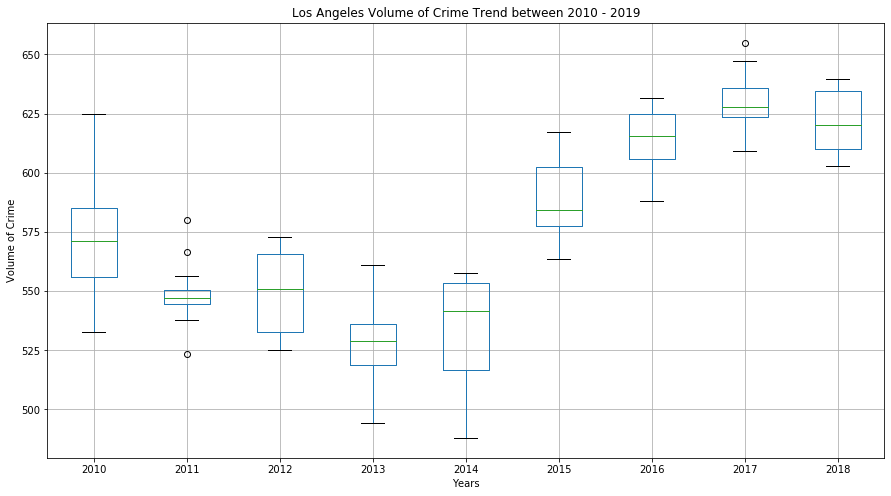

In [43]:
# Generate a box and whiskers plot for last 10 years
annual_crime.boxplot(figsize=(15,8))
plt.title('Los Angeles Volume of Crime Trend between 2010 - 2019')
plt.xlabel('Years')
plt.ylabel('Volume of Crime')
plt.savefig('LA_Volume_of_Crime_Trend_boxplot.png')
plt.show();


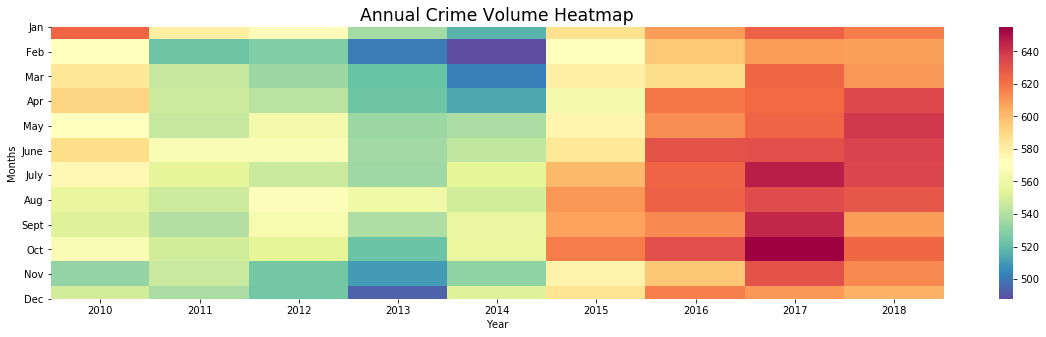

In [44]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(annual_crime, ax=ax, cmap= plt.cm.Spectral_r)
ax.set_xlabel('Year')
ax.set_ylabel('Months')
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
                  rotation= 'horizontal')
ax.set_title('Annual Crime Volume Heatmap', fontsize= 'xx-large')
plt.savefig('visualizations/Los Angelese Annual Crime Volume Heatmap.png')
plt.show();

In [45]:
#Pickling annual_crime dataframe and monthly crime
annual_crime.to_pickle("data/pickled/annual_crime.pkl")
monthly_crime.to_pickle("data/pickled/monthly_crime.pkl")